# Introduction to Pandas Library
- Pandas is an open source library in python which is know for its rich applications and utilities for all kinds of mathematical, financial and statistical functions
- It is useful in data manipulation and analysis
- It provides fast, flexible, and expressive data structures designed to make working with structured (tabular, multidimensional, potentially heterogeneous) and time series data



#### Installing pandas

In [ ]:
!pip install pandas

#### Importing pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataframe

A DataFrame is two dimensional data structure where the data is arranged in the tabular format in rows and columns

#### DataFrame features:

- Columns can be of different data types
- Size of dataframe can be changes
- Axes(rows and columns) are labeled
- Arithmetic operations can be performed on rows and columns

### Reading data from External Data Sources

#### Excel

In [ ]:
!pip install openpyxl

In [ ]:
df = pd.read_excel(r"Employee_dummy_data.xlsx", sheet_name="Sheet1", 
                   usecols=range(0, 3),nrows=2) # Reads data as a dataframedf

In [ ]:
df = pd.read_excel(r"Employee_dummy_data.xlsx", sheet_name="Sheet1", 
                   usecols=range(0, 3),skiprows=range(4, 6)) # skip lat 2 rowsdf

In [ ]:
df.to_excel()

In [ ]:
import io
import pandas as pd
import msoffcrypto

passwd = 'xyz'

decrypted_workbook = io.BytesIO()
with open(path_to_your_file, 'rb') as file:
    office_file = msoffcrypto.OfficeFile(file)
    office_file.load_key(password=passwd)
    office_file.decrypt(decrypted_workbook)

df = pd.read_excel(decrypted_workbook, sheet_name='abc')

#### Sharepoint

In [ ]:
!pip install Office365-REST-Python-Client pandas

In [ ]:
from office365.sharepoint.client_context import ClientContext
from office365.runtime.auth.authentication_context import AuthenticationContext
import pandas as pd
import io

# SharePoint site URL
sharepoint_url = "https://knowledgecornerin.sharepoint.com/sites/mylearnings/"
file_relative_url = "/sites/mylearnings/Documents/Invoices.xlsx"


# Authentication
username = "vaidehi.nair@knowledgecorner.in"
password = "password"

ctx_auth = AuthenticationContext(sharepoint_url)
if ctx_auth.acquire_token_for_user(username, password):
    ctx = ClientContext(sharepoint_url, ctx_auth)
    with io.BytesIO() as file:
        file = ctx.web.get_file_by_server_relative_url(file_relative_url).download(file).execute_query()
        file.seek(0)
        df = pd.read_excel(file)  # Read into pandas dataframe
        print(df.head())  # Display first few rows
        print("success")
else:
    print("Authentication failed!")

In [ ]:
import sys
print(sys.version)


### Merge and concate Dataframes

In [ ]:
df_emp = pd.read_excel(r"Employee_dummy_data.xlsx")
df_emp

In [ ]:
df_desg = pd.DataFrame({"Ecode" : range(102, 108), 
                        "Designation" : ["Manager", "Team Leader", "Developer", "Intern", "Developer", "PMO"]})
df_desg

In [ ]:
df_temp = df_emp.merge(df_desg, how = "inner", left_on="Employee Code", right_on= "Ecode")
df_temp

In [ ]:
df_temp = df_emp.merge(df_desg, how = "left", left_on="Employee Code", right_on= "Ecode")
df_temp

In [ ]:
df_temp = df_emp.merge(df_desg, how = "right", left_on="Employee Code", right_on= "Ecode")
df_temp

In [ ]:
df_temp = df_emp.merge(df_desg, how = "outer", left_on="Employee Code", right_on= "Ecode")
df_temp

In [ ]:
df_temp.to_excel(r"filename.xlsx")

In [ ]:
df1 = pd.DataFrame({"Date" : ["2024-01", "2024-02", "2024-03", "2024-04", "2024-05"], 
                   "Sales" : [5000, 8000, 4000, 6000, 3000]})
df2 = pd.DataFrame({"Date" : ["2024-06", "2024-07", "2024-08", "2024-09", "2024-10"], 
                   "Sales" : [5000, 8000, 4000, 6000, 3000]})

pd.concat((df2, df2, df2, df2))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###### Ex. Read data from `Orders.csv`

In [168]:
df = pd.read_csv("Orders.csv")
df

,Date,Order ID,Product,City,Discount,Shipping Cost,Sales,Profit
0,01-01-2021,ORD10001,PROD3,Mumbai,0,118,2682.0,NaN
1,01-01-2021,ORD10002,PROD3,Pune,0,138,2662.0,NaN
2,03-01-2021,ORD10003,PROD6,Pune,15,140,2410.0,NaN
3,03-01-2021,ORD10004,PROD6,Surat,0,90,2910.0,NaN
4,04-01-2021,ORD10005,PROD7,Surat,3,86,2436.0,NaN
...,...,...,...,...,...,...,...,...
9995,31-12-2024,ORD19996,PROD6,Mumbai,25,120,2130.0,NaN
9996,31-12-2024,ORD19997,PROD8,Mumbai,0,130,2700.0,NaN
9997,31-12-2024,ORD19998,PROD5,Surat,20,82,1678.0,NaN
9998,31-12-2024,ORD19999,PROD3,Hyderabad,0,108,2542.0,NaN


#### Drop a column or row from dataframe

In [ ]:
df.drop(columns=["Order ID"], inplace=True)

##### Note - 

- functions like - drop(), fillna(), sort_values(), replace(), etc.
- They generate new dataframes without modifying original dataframe
- Save the output in a new variable or use option `inplace = True`

#### Working with **null** values

`df.isna()` - Detect missing values. Return a boolean same-sized object indicating if the values are NA.

`df.fillna(value=None, inplace=False)` - Fill NA/NaN values using the specified method.

In [107]:
df.isna().any() # returns True or False for each column

Date             False
Order ID         False
Product          False
City             False
Discount         False
Shipping Cost    False
Sales            False
Profit            True
dtype: bool

In [108]:
df.isna().sum() # returns count of null values in each column

Date                 0
Order ID             0
Product              0
City                 0
Discount             0
Shipping Cost        0
Sales                0
Profit           10000
dtype: int64

In [109]:
df.fillna({"Profit": 0}) # Replacing NaN with default 0, inplace = True can be set here

,Date,Order ID,Product,City,Discount,Shipping Cost,Sales,Profit
0,01-01-2021,ORD10001,PROD3,Mumbai,0,118,2682.0,0.0
1,01-01-2021,ORD10002,PROD3,Pune,0,138,2662.0,0.0
2,03-01-2021,ORD10003,PROD6,Pune,15,140,2410.0,0.0
3,03-01-2021,ORD10004,PROD6,Surat,0,90,2910.0,0.0
4,04-01-2021,ORD10005,PROD7,Surat,3,86,2436.0,0.0
...,...,...,...,...,...,...,...,...
9995,31-12-2024,ORD19996,PROD6,Mumbai,25,120,2130.0,0.0
9996,31-12-2024,ORD19997,PROD8,Mumbai,0,130,2700.0,0.0
9997,31-12-2024,ORD19998,PROD5,Surat,20,82,1678.0,0.0
9998,31-12-2024,ORD19999,PROD3,Hyderabad,0,108,2542.0,0.0


#### Drop null rows
df.dropna(`axis = 0`, `how = "any"`, `inplace = False`)
- axis 0 for row or 1 for column
- how - {any or all}

In [110]:
df.dropna() # drop row with any 1 null value

,Date,Order ID,Product,City,Discount,Shipping Cost,Sales,Profit


In [169]:
df.dropna(axis = 1, how = "all", inplace=True) # delete only the column which have all null values

In [112]:
df.head()

,Date,Order ID,Product,City,Discount,Shipping Cost,Sales
0,01-01-2021,ORD10001,PROD3,Mumbai,0,118,2682.0
1,01-01-2021,ORD10002,PROD3,Pune,0,138,2662.0
2,03-01-2021,ORD10003,PROD6,Pune,15,140,2410.0
3,03-01-2021,ORD10004,PROD6,Surat,0,90,2910.0
4,04-01-2021,ORD10005,PROD7,Surat,3,86,2436.0


#### Renaming Columns

###### Rename Columns (column 5 - 8 are not accessible)

In [113]:
df.columns

Index(['Date', 'Order ID', 'Product', 'City', 'Discount', 'Shipping Cost',
       'Sales'],
      dtype='object')

In [ ]:
headers = ["Year/Month", "Order", "Product", ... ]
# df.columns = header

In [114]:
# Extract columns matching substring
df.columns[df.columns.str.contains(input("Enter substring - "))]

Enter substring -  D


Index(['Date', 'Order ID', 'Discount'], dtype='object')

#### Rename Single Column

In [ ]:
df.rename({"Date" : "Year/Month"}, axis=1, inplace=True)

#### Understanding Data in Dataframe

- `df.shape` - gives the size of the dataframe in the format (row_count x column_count)
- `df.dtypes` - returns a Series with the data type of each column
- `df.info()` - prints information about a DataFrame including the index dtype and columns, non-null values and memory usage
- `df.head()` - prints the first 5 rows of you dataset including column header and the content of each row
- `df.tail()` - prints the last 5 rows of you dataset including column header and the content of each row

In [115]:
df.shape

(10000, 7)

In [116]:
df.dtypes

Date              object
Order ID          object
Product           object
City              object
Discount           int64
Shipping Cost      int64
Sales            float64
dtype: object

In [117]:
df.head()

,Date,Order ID,Product,City,Discount,Shipping Cost,Sales
0,01-01-2021,ORD10001,PROD3,Mumbai,0,118,2682.0
1,01-01-2021,ORD10002,PROD3,Pune,0,138,2662.0
2,03-01-2021,ORD10003,PROD6,Pune,15,140,2410.0
3,03-01-2021,ORD10004,PROD6,Surat,0,90,2910.0
4,04-01-2021,ORD10005,PROD7,Surat,3,86,2436.0


In [ ]:
df.head(3)

In [118]:
df.tail()

,Date,Order ID,Product,City,Discount,Shipping Cost,Sales
9995,31-12-2024,ORD19996,PROD6,Mumbai,25,120,2130.0
9996,31-12-2024,ORD19997,PROD8,Mumbai,0,130,2700.0
9997,31-12-2024,ORD19998,PROD5,Surat,20,82,1678.0
9998,31-12-2024,ORD19999,PROD3,Hyderabad,0,108,2542.0
9999,31-12-2024,ORD20000,PROD8,Mumbai,15,130,2275.5


In [ ]:
df.tail(3)

In [78]:
df.Sales.astype(float)

0       2682.0
1       2662.0
2       2410.0
3       2910.0
4       2436.0
         ...  
9995    2130.0
9996    2700.0
9997    1678.0
9998    2542.0
9999    2275.5
Name: Sales, Length: 10000, dtype: float64

#### Removing Duplicate Data

In [88]:
df_temp = pd.DataFrame({"Invoice#" : range(1, 7),
                        "Product" : ["P1", "P2", "P2", "P1", "P2", "P1",],
                       "Sales" : [2000, 3000, 3000, 5000, 2000, 3000 ]})
df_temp

,Invoice#,Product,Sales
0,1,P1,2000
1,2,P2,3000
2,3,P2,3000
3,4,P1,5000
4,5,P2,2000
5,6,P1,3000


In [119]:
df_temp.duplicated().any() # Returns True if atleast 1 row is duplicate

np.False_

In [120]:
df_temp.duplicated().sum() # 1 row is duplicate

np.int64(0)

In [121]:
df_temp.duplicated(subset=["Product", "Sales"]).sum() # 1 row is duplicate

np.int64(1)

In [122]:
# Extract the duplicate row
df_temp[df_temp.duplicated(subset=["Product", "Sales"])]

,Invoice#,Product,Sales
2,3,P2,3000


In [123]:
# Extract the duplicate row
df_temp[df_temp.duplicated(["Product", "Sales"], keep=False)]

,Invoice#,Product,Sales
1,2,P2,3000
2,3,P2,3000


#### Extract Rows and Columns from the Dataframe

###### Ex. Extract Sales and calculate total average sales

In [124]:
df["Sales"].mean() # Average sales

np.float64(2374.4075700000003)

###### Ex. Extract Product and Sales

In [ ]:
df[["Product", "Sales"]]

###### Ex. Extract row number 3

In [104]:
df.loc[3]

Year/Month       03-01-2021
Order ID           ORD10004
Product               PROD6
City                  Surat
Discount                  0
Shipping Cost            90
Sales                2910.0
Name: 3, dtype: object

##### Note - Single row or a column will extracted as Series

###### Ex. Extract row 3 sales column

In [125]:
df.loc[3, "Sales"]

np.float64(2910.0)

#### Filter data from dataframes

###### Ex. Extract Data for City `Surat`

In [ ]:
df[df["City"] == "Surat"]

###### Ex. Extract rows where discount is greater than 25

In [ ]:
df[df["Discount"] > 25]

###### Ex. Extract data for City Surat and Pune

In [ ]:
df[df["City"].isin(["Surat", "Pune"])]

###### Ex. Extract rows where discount is between 15 and 30

In [ ]:
df[df["Discount"].between(15, 30)]

###### Ex. Extract data for Prodct "PROD3" and City Mumbai

In [ ]:
df[(df["Product"] == "PROD3") & (df["City"] == "Mumbai")]  # & - set operator - intersection

In [ ]:
df[np.logical_and(df["Product"] == "PROD3", df["City"] == "Mumbai")]

#### Replacing values

df.replace(old_value, new_value, inplace=True)

In [ ]:
df.replace({"City" : {"Mumbai" : "Bombay"}, ""})

#### Adding a new Column by calculation

###### Ex. Calulate `Net Revenue = Sales - Sales * Discount - Shipping Cost` and add the result as new column

In [170]:
df["Net Revenue"] = df["Sales"] * (1 - df["Discount"]/100) - df["Shipping Cost"]
df.head()

,Date,Order ID,Product,City,Discount,Shipping Cost,Sales,Net Revenue
0,01-01-2021,ORD10001,PROD3,Mumbai,0,118,2682.0,2564.00
1,01-01-2021,ORD10002,PROD3,Pune,0,138,2662.0,2524.00
2,03-01-2021,ORD10003,PROD6,Pune,15,140,2410.0,1908.50
3,03-01-2021,ORD10004,PROD6,Surat,0,90,2910.0,2820.00
4,04-01-2021,ORD10005,PROD7,Surat,3,86,2436.0,2276.92


###### Ex. How many unique products are sold?

In [141]:
df["Product"].unique()

array(['PROD3', 'PROD6', 'PROD7', 'PROD9', 'PROD8', 'PROD1', 'PROD2',
       'PROD5', 'PROD4'], dtype=object)

###### Ex. How many times each product was sold?

In [143]:
df["Product"].value_counts()

Product
PROD6    2494
PROD5    1941
PROD3    1200
PROD8    1045
PROD7     900
PROD9     850
PROD1     706
PROD2     639
PROD4     225
Name: count, dtype: int64

In [147]:
(df["Product"].value_counts(normalize=True)* 100).round(1).astype(str) + "%"

Product
PROD6    24.9%
PROD5    19.4%
PROD3    12.0%
PROD8    10.4%
PROD7     9.0%
PROD9     8.5%
PROD1     7.1%
PROD2     6.4%
PROD4     2.2%
Name: proportion, dtype: object

<Axes: xlabel='Product'>

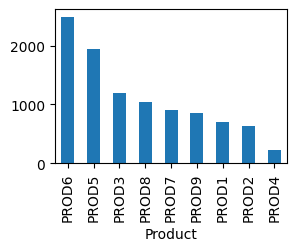

In [156]:
# Visualise using pandas function - 
df["Product"].value_counts().plot(kind = "bar", figsize = (3, 2))

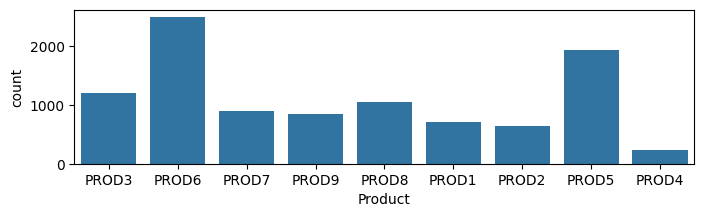

In [154]:
# Visualise using sns.countplot function - 
plt.figure(figsize = (8, 2))
sns.countplot(x = df["Product"])
# plt.savefig("chart.png")

#### Insert a column in between
df.insert(`index`, `column_name`, `default_value`)

###### Create columns Year and Month - extract data using pd.DatetimeIndex

In [186]:
df["Date"] = pd.to_datetime(df.Date, format = "mixed")
# df.insert(1, "Year", df["Date"].dt.year)
# df.insert(2, "Month", df["Date"].dt.month)
df.insert(2, "Month_", df["Date"].dt.month_name())
# df.insert(1, "Year/Month", df["Date"].dt.to_period("M"))
df.head(2)

,Date,Year/Month,Month_,Year,Month,Order ID,Product,City,Discount,Shipping Cost,Sales,Net Revenue
0,2021-01-01,2021-01,January,2021,1,ORD10001,PROD3,Mumbai,0,118,2682.0,2564.0
1,2021-01-01,2021-01,January,2021,1,ORD10002,PROD3,Pune,0,138,2662.0,2524.0


###### Ex. What is the trend of order volumes over different months and years?

<Axes: xlabel='Date'>

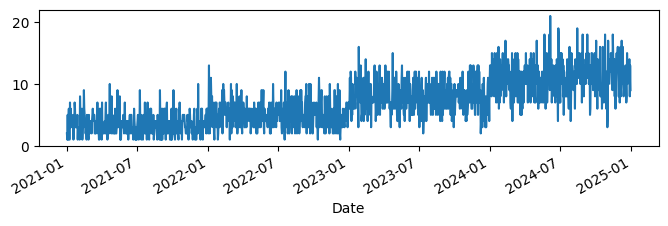

In [185]:
df.groupby("Date")["Order ID"].count().plot(kind = "line", figsize = (8, 2))

###### Ex. What is the trend of sales over different months and years?

<Axes: xlabel='Date'>

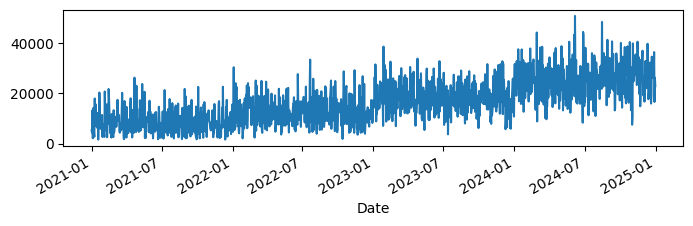

In [181]:
df.groupby("Date")["Sales"].sum().plot(kind = "line", figsize = (8, 2))

<Axes: xlabel='Year/Month'>

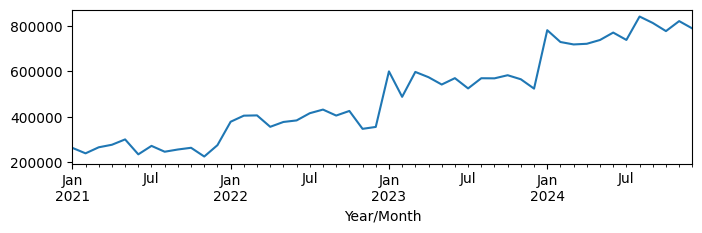

In [184]:
df.groupby("Year/Month")["Sales"].sum().plot(kind = "line", figsize = (8, 2))

###### Ex. Sesonality Analysis for Sales

In [ ]:
df.groupby(["Month", "Month_"])["Sales"].sum().plot(kind = "bar", figsize = (8, 2))

In [ ]:
plt.figure(figsize = (10, 2))
sns.barplot(data = df, x = "Month_", y = "Sales", estimator="sum")

###### Ex. Analyse Growth over years

In [225]:
data = df.groupby("Year", as_index=False)["Sales"].sum()
data["Growth"] = "0"
data.loc[1:, "Growth"] = list((np.diff(data.Sales) / data.Sales[:-1] * 100).round(1).astype(str) + "%")
data

,Year,Sales,Growth
0,2021,3100454.5,0
1,2022,4678492.0,50.9%
2,2023,6709759.0,43.4%
3,2024,9255370.2,37.9%


<Axes: xlabel='Year'>

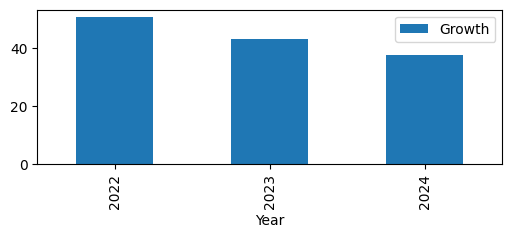

In [230]:
data = df.groupby("Year", as_index=False)["Sales"].sum()
data["Growth"] = 0.0
data.loc[1:, "Growth"] = list((np.diff(data.Sales) / data.Sales[:-1] * 100).round(1))
data = data.loc[1:]
data.plot(kind = "bar", x = "Year", y = "Growth", figsize = (6, 2))

###### Ex. Find product wise total Sales - bar chart

In [315]:
data = df.groupby("Product", as_index=False)["Sales"].sum().sort_values("Sales", ascending=False, ignore_index=True)
data

,Product,Sales
0,PROD6,6468200.0
1,PROD5,3623786.0
2,PROD9,3347090.0
3,PROD3,2898116.0
4,PROD8,2534081.5
5,PROD7,2001102.0
6,PROD2,1368370.0
7,PROD1,1184210.0
8,PROD4,319120.2


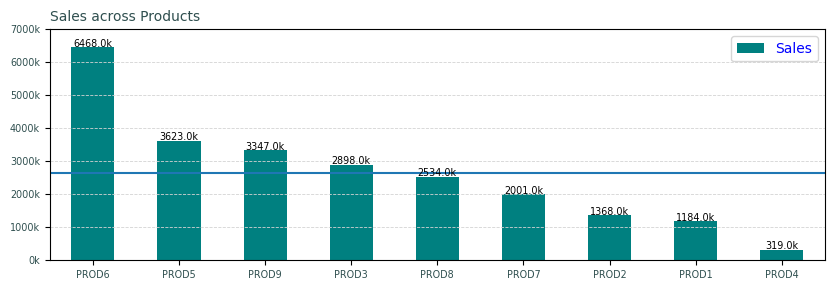

In [316]:
data.plot(kind = "bar", figsize = (10, 3), x = "Product", y = "Sales", color = "Teal")
plt.title("Sales across Products", loc = "left", size = "medium", color = "darkslategrey")
plt.xticks(rotation = 0, size = "x-small", color = "darkslategrey")
y_axis_labels = (pd.Series(range(0, int(data.Sales.max()) + 1000000, 1000000))//1000).astype(str) + "k"
y_axis = range(0, int(data.Sales.max()) + 1000000, 1000000)
plt.yticks(y_axis, labels=y_axis_labels, size = "x-small", color = "darkslategrey")
plt.xlabel("")
plt.grid(axis = "y", color = "lightgrey", linestyle='--', linewidth=0.6)
plt.legend(labelcolor = "Blue")
plt.axhline(data.Sales.mean())

for x, y in list(zip(data.index, data.Sales)) :
    plt.annotate(f"{y//1000}k",xy = (x, y+10000), ha= "center", size = "x-small")
plt.show()

In [297]:
y_axis = (pd.Series(range(0, int(data.Sales.max()) + 1000000, 1000000))//1000).astype(str) + "k"

0       0k
1    1000k
2    2000k
3    3000k
4    4000k
5    5000k
6    6000k
7    7000k
dtype: object

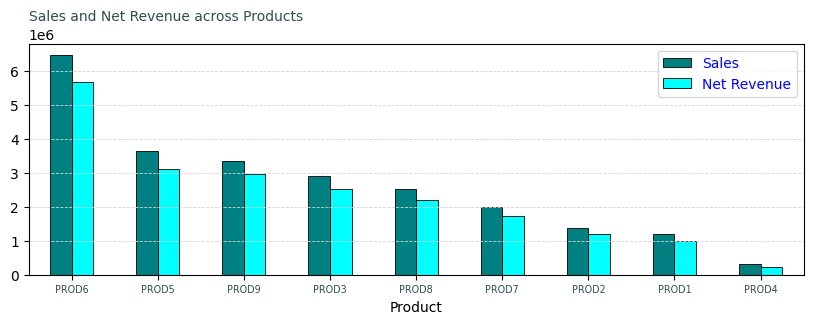

In [311]:
data = df.groupby("Product")[["Sales", "Net Revenue"]].sum().sort_values("Sales", ascending=False)
data.plot(kind = "bar", figsize = (10, 3), color = ["Teal", "Cyan"], edgecolor = "Black", linewidth = 0.6)
plt.title("Sales and Net Revenue across Products", loc = "left", size = "medium", color = "darkslategrey")
plt.xticks(rotation = 0, size = "x-small", color = "darkslategrey")
plt.grid(axis = "y", color = "lightgrey", linestyle='--', linewidth=0.6)
plt.legend(labelcolor = "Blue")

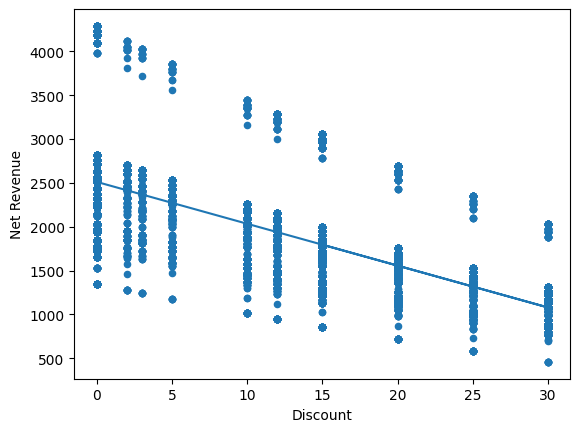

In [323]:
df.plot(kind = "scatter", x = "Discount", y = "Net Revenue")
m, c = np.polyfit(df.Discount, df["Net Revenue"], 1)
y = m * df.Discount + c
plt.plot(df.Discount, y, ls = "-")